# Group 9: Provisional Neural Network Model
## Week 1

**COVID-19 Model: XXXXX**

**Potential Limitations:**


Data Source: Our World in Data
https://github.com/owid/covid-19-data/tree/master/public/data



In [1]:
# Import  Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np


# import seaborn as sns (pip install)  -- https://www.tensorflow.org/tutorials/keras/regression


In [2]:
# Import Dataset
covid_data_raw_df = pd.read_csv('owid-covid-data.csv')
covid_data_raw_df.head()


# Import from Tan's provisional database

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


## 1. Preprocess Data

•	Provisionally, select desired columns

•	Generate a list of categorical variable names

•	Check the number of unique values in each column

•	Bucketing/Binning (educes the number of unique catergoirical values by collapsing all infrequent categorical values into a single "other" category. 

•	Create a OneHotEncoder instance (identifies all unique column values and splits single categorical column into a series of columns)

•	Fit and transform the OneHotEncoder (Using the created categorical variable list)

•	Add the encoded variable names to the DataFrame

•	Merge one-hot encoded features and drop the originals



In [5]:
# Scale down data set to minimal data for model proof-of-concept (poc)
covid_data_poc_df = covid_data_raw_df[["location", "date", "new_cases", "new_deaths", "population"]]

# For proof-of-concept, focus on 1 country


covid_data_poc_df.head()

,location,date,new_cases,new_deaths,population
0,Afghanistan,2020-02-24,1.0,NaN,38928341.0
1,Afghanistan,2020-02-25,0.0,NaN,38928341.0
2,Afghanistan,2020-02-26,0.0,NaN,38928341.0
3,Afghanistan,2020-02-27,0.0,NaN,38928341.0
4,Afghanistan,2020-02-28,0.0,NaN,38928341.0


In [4]:
# a. Generate categorical variable list
covid_data_raw_cat = covid_data_raw_df.dtypes[covid_data_raw_df.dtypes == "object"].index.tolist()
print(covid_data_raw_df)


# * Shows there are 8 categorical variables that need encoding.  

      iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
75553      ZWE    Africa     Zimbabwe  2021-03-13      36471.0       48.0   
75554      ZWE    Africa     Zimbabwe  2021-03-14      36484.0       13.0   
75555      ZWE    Africa     Zimbabwe  2021-03-15      36504.0       20.0   
75556      ZWE    Africa     Zimbabwe  2021-03-16      36535.0       31.0   
75557      ZWE    Africa     Zimbabwe  2021-03-17      36552.0       17.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  .

In [8]:
# b. Check the number of unique values in each column
attrition_df[attrition_cat].nunique()


# Verify none of the categorical variables have more than 10 unique 
# values and require bucketing.

# Bucketing--reduces the number of unique catergoirical values by
# collapsing all infrequent (=> 10) categorical values into a 
# single "other" category.  

# c. --> No bucketing/binning required

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [9]:
# d. Create a OneHotEncoder instance
# (identifies all unique column values and splits single categorical 
# column into a series of columns)
enc = OneHotEncoder(sparse=False)

# e. Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# f. Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [10]:
# g. Merge one-hot encoded features and drop the originals
#    Use an INNER JOIN
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## 2. Split Data into Training/Testing

In [12]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 55)
(368, 55)
(1102,)
(368,)


## 3. Normalize/Standardize Numerical Features

**Using StandardScaler**

In [4]:
# Create standard scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale both the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## 4. Build the Model

a. **Pick Model**: Deep Neural Net, Sequential

b. **Input Layer**: Add the number of input features equal to the number of variables in the Feautures DataFrame

c. **Hidden Layers**: 2 hidden layers

    i. First: Use Keras Dense Class, 8 neurons, relu activation function to identify nonlinear characteristics
    
    ii. Second: Use Keras Dense Class, 5 neurons, relu activation function

d. **Output Layer**:  Sigmoid activation function to predict the probability that an employee is at risk for attrition

e. **Verify Model Structure**:

f. **Compile the Model and Define Loss / Accuracy Metrics**: Use  model as a binary classifier, use the **binary_crossentropy loss function**, **adam optimizer**, and **accuracy metrics** --same parameters used for our basic neural network. 

In [14]:
# a.- b. Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# c.i. First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# c.ii. Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# d. Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# e. Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [15]:
# f. Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



## 5. Fit/Train the Model

a. Train model on training data

b. Evaluate model using test data (Loss and Accuracy.  

In [17]:
# a Train the model on training data
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8294
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8294
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8294
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8294
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8294
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8294
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8294
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8303
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8294
Epoch 10/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8294
Epoch 11/

In [18]:
# b. Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.5331 - accuracy: 0.8668
Loss: 0.533132016658783, Accuracy: 0.866847813129425


<AxesSubplot:>

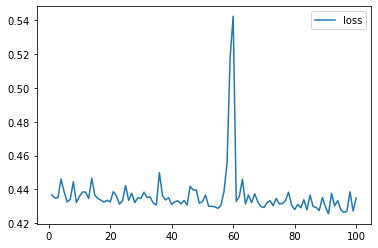

In [19]:
# visualize model's loss over the full 100 epochs

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

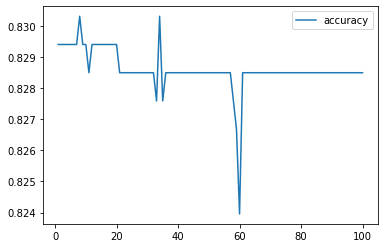

In [20]:
# Plot model's accuracy over all epochs
history_df.plot(y="accuracy")